### DATA 255: HOMEWORK_02

Use the code provided in demo 02 to complete this assignment

#### Step 1. Follow along with the tutorial to gain an understanding of the process

Beginning with the setup and visualisation for "QMNIST" Dataset

#### Step 2: Reproduce the results utilizing the “QMNIST” dataset

Import the "QMNIST"Dataset

QMNIST dataset is the extended version of the most popular MNIST dataset. The original MNIST datset has 10000 test randomly sampled images from the 60000 images, which were never released. QMNIST dataset is generated from the original data from NIST database to match the MNIST dataset with an improvement. 

The QMNIST dataset contains handwritten images of digits(0-9). Input is 28x28 pixel Grayscale image and output is the single label corresponding to the image. Both MNIST and QMNIST are used for classification task of handwritten digit recognition, QMNIST offers enhancements in image quality, annotations, and metadata. This can lead to better performance and generalisation of ML models.


In [1]:
# Import the Dependencies
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Load QMNIST dataset and preprocess

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.QMNIST(root='./data_QMNIST', train=True, download=True, transform=transform)
testset = torchvision.datasets.QMNIST(root='./data_QMNIST', train=False, download=True, transform=transform)

#Create DataLoader
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

100%|████████████████████████████| 9704059/9704059 [00:01<00:00, 6280167.75it/s]


Extracting ./data_QMNIST/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data_QMNIST/QMNIST/raw


100%|██████████████████████████████| 463024/463024 [00:00<00:00, 6059347.89it/s]

Extracting ./data_QMNIST/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data_QMNIST/QMNIST/raw


100%|████████████████████████████| 9742279/9742279 [00:01<00:00, 6782045.16it/s]


Extracting ./data_QMNIST/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data_QMNIST/QMNIST/raw


100%|██████████████████████████████| 526800/526800 [00:00<00:00, 6331877.61it/s]

Extracting ./data_QMNIST/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data_QMNIST/QMNIST/raw


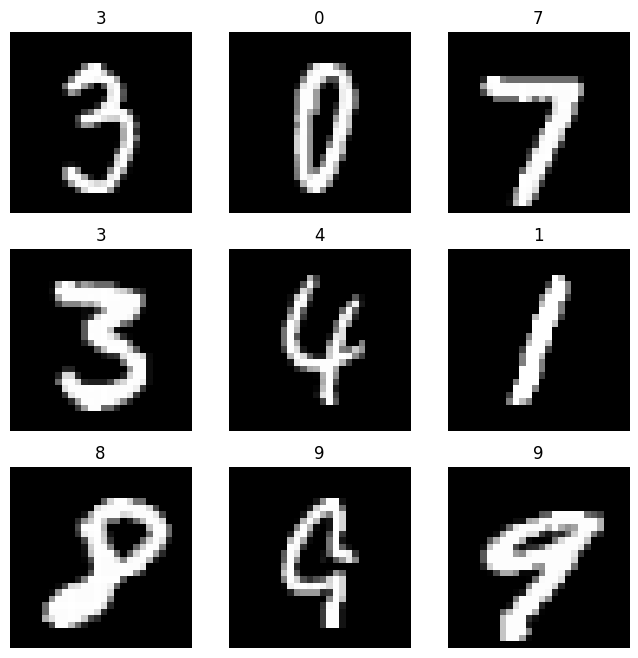

In [3]:
# Visualize QMNIST samples
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

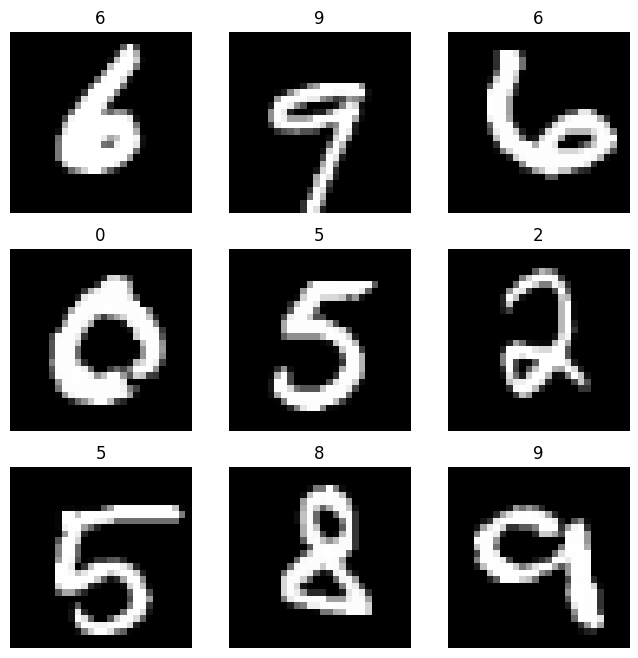

In [4]:
# Visualize QMNIST test samples
figure = plt.figure(figsize=(8, 8))
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(testset), size=(1,)).item()
    img, label = testset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

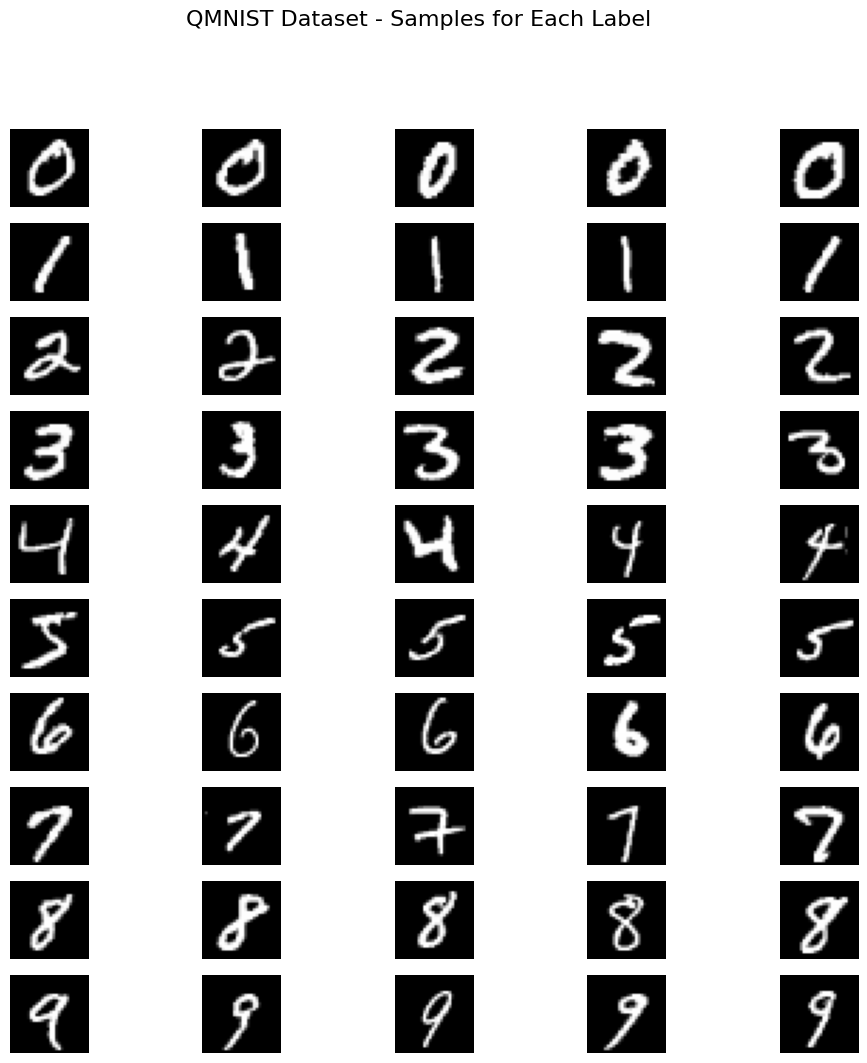

In [5]:
# Let's see different samples of same label in the dataset

def visualize_all_labels(dataset, num_samples_per_label=5):
    fig, axes = plt.subplots(10, num_samples_per_label, figsize=(12, 12))
    fig.suptitle('QMNIST Dataset - Samples for Each Label', fontsize=16)
    
    for label in range(10):
        samples_found = 0
        for i, (image, lbl) in enumerate(dataset):
            if lbl == label:
                ax = axes[label, samples_found]
                ax.imshow(image.numpy().squeeze(), cmap='gray')
                ax.axis('off')
                if samples_found == 0:
                    ax.set_ylabel(f'Label: {label}', fontsize=12, rotation=0, labelpad=60, verticalalignment='center')
                samples_found += 1
                if samples_found >= num_samples_per_label:
                    break

    plt.subplots_adjust(hspace=0.2)
    plt.show()

# Visualize samples for all labels
visualize_all_labels(trainset)

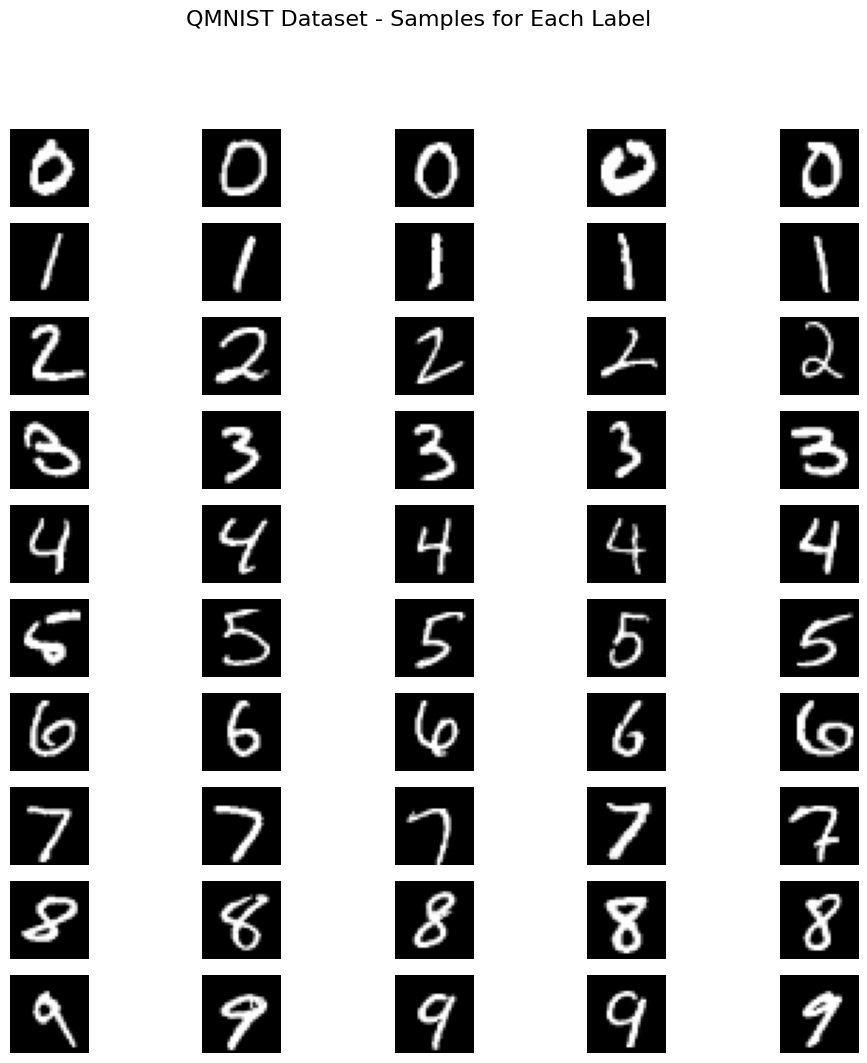

In [6]:
# samples from test dataset
visualize_all_labels(testset)

#### Step 3: Report on the results in terms of prediction accuracy on the train and test datasets

In [7]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [8]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.9778148829936981
Epoch 1, Batch 200, Loss: 0.44178056210279465
Epoch 1, Batch 300, Loss: 0.3497069373726845
Epoch 1, Batch 400, Loss: 0.34903848901391027
Epoch 1, Batch 500, Loss: 0.3005613589286804
Epoch 1, Batch 600, Loss: 0.28579227164387705
Epoch 1, Batch 700, Loss: 0.27018422380089757
Epoch 1, Batch 800, Loss: 0.2664454844594002
Epoch 1, Batch 900, Loss: 0.22879592563956977
Epoch 2, Batch 100, Loss: 0.20350432742387056
Epoch 2, Batch 200, Loss: 0.1909997792541981
Epoch 2, Batch 300, Loss: 0.17329262815415858
Epoch 2, Batch 400, Loss: 0.17288899656385184
Epoch 2, Batch 500, Loss: 0.18751049801707267
Epoch 2, Batch 600, Loss: 0.16693883743137122
Epoch 2, Batch 700, Loss: 0.1760391142219305
Epoch 2, Batch 800, Loss: 0.1631279183551669
Epoch 2, Batch 900, Loss: 0.163719149120152
Epoch 3, Batch 100, Loss: 0.13062902465462684
Epoch 3, Batch 200, Loss: 0.15228293366730214
Epoch 3, Batch 300, Loss: 0.13515998756513
Epoch 3, Batch 400, Loss: 0.1194659398123622
E

In [9]:
# Evaluate the model on training data
model.eval()
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

print(f'Accuracy on train set: {correct_train / total_train}%')

Accuracy on train set: 0.9765%


In [10]:
# Evaluate the model on test data
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

print(f'Accuracy on test set: {correct_test / total_test}%')


Accuracy on test set: 0.9666166666666667%


In [11]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

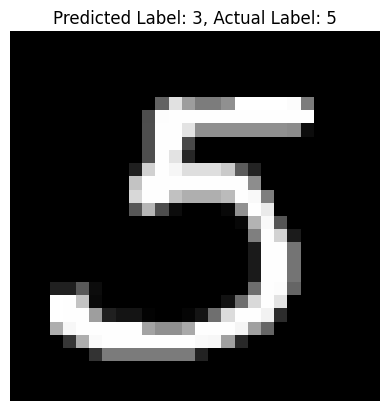

In [12]:
# Get one test image and its label
image, label = images[30], labels[30]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[30]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

In [13]:
# Define the label mapping for QMNIST
labels_map = {
    0: "0",  # Zero
    1: "1",  # One
    2: "2",  # Two
    3: "3",  # Three
    4: "4",  # Four
    5: "5",  # Five
    6: "6",  # Six
    7: "7",  # Seven
    8: "8",  # Eight
    9: "9",  # Nine
}

In [14]:
# Evaluating the model and collecting predictions and labels. Adding labels_list for the comparision with predictions
model.eval()
predictions = []
labels_list = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        labels_list.extend(labels.numpy())

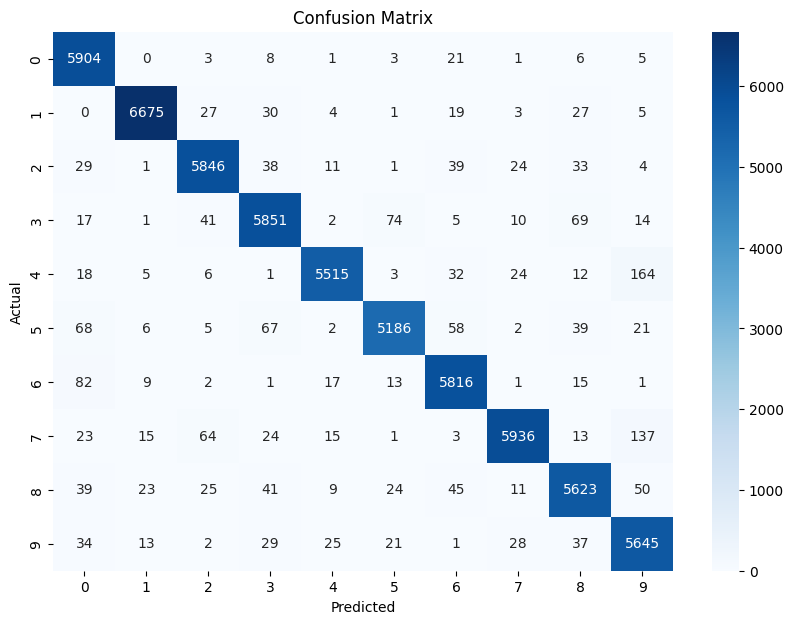

In [15]:
# Creating confusion matrix
cm = confusion_matrix(labels_list, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_map.values(), yticklabels=labels_map.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

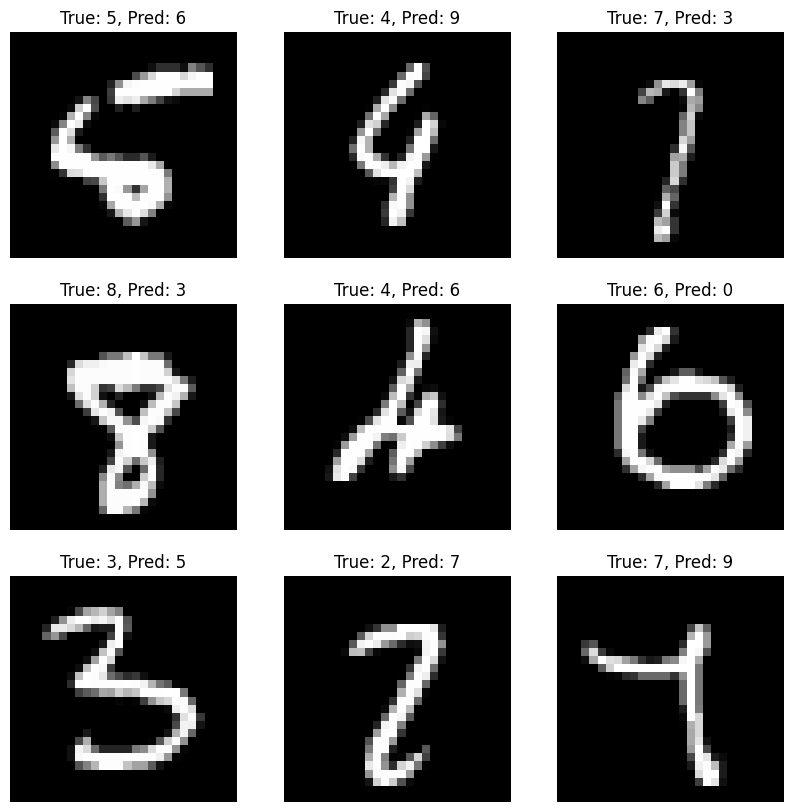

In [16]:
# Visualizing misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(labels_list, predictions)) if true != pred]
num_misclassified = len(misclassified_indices)

figure = plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:9]):  
    img = testset[idx][0].squeeze()
    true_label = labels_list[idx]
    pred_label = predictions[idx]
    ax = figure.add_subplot(3, 3, i + 1)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'True: {labels_map[true_label]}, Pred: {labels_map[pred_label]}')
    ax.axis('off')
plt.show()

With the accuracy of 96% on test datset, there were few misclassification images that model was not able to recognize correctly. The confusion matrix above tells us about the number of misclassified results and we can learn each class is being misclassified with others. Visualisatiing few of the misclassified images along with their predicted and actual labels gives us the idea of the error as what model is not able to learn. 

#### Step 4. Choose one of the proposed modifications below:
##### - Add another Dense layer of 128 nodes
##### - Increase the current number of nodes in the layer to 256

Let's add another dense layer of 128 nodes, and it should increase the complexity of model and be able to learn the complex patterns more as seen in misclassification visualisation. Hopefully, it should classify the predictions correct and improve accuracy

#### Step 5. Modify the model based on the chosen method and train

In [17]:
class MLP_Modified(nn.Module):
    def __init__(self):
        super(MLP_Modified, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # Additional layer with 128 nodes
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # New layer
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [18]:
# Initialize the modified neural network
model_modified = MLP_Modified()

# Define the loss function and optimizer for the modified model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_modified.parameters(), lr=0.001)

# Train the modified neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_modified.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_modified(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training Modified Model')


Epoch 1, Batch 100, Loss: 1.0802259808778762
Epoch 1, Batch 200, Loss: 0.440216957628727
Epoch 1, Batch 300, Loss: 0.38059619277715684
Epoch 1, Batch 400, Loss: 0.33679886810481546
Epoch 1, Batch 500, Loss: 0.2976967678964138
Epoch 1, Batch 600, Loss: 0.2958971820771694
Epoch 1, Batch 700, Loss: 0.2749642162024975
Epoch 1, Batch 800, Loss: 0.2611635985225439
Epoch 1, Batch 900, Loss: 0.2314184983074665
Epoch 2, Batch 100, Loss: 0.2213118452951312
Epoch 2, Batch 200, Loss: 0.20810223210603
Epoch 2, Batch 300, Loss: 0.18105988394469022
Epoch 2, Batch 400, Loss: 0.19195294428616763
Epoch 2, Batch 500, Loss: 0.19559389118105172
Epoch 2, Batch 600, Loss: 0.17034322306513786
Epoch 2, Batch 700, Loss: 0.1834447069838643
Epoch 2, Batch 800, Loss: 0.15802936550229787
Epoch 2, Batch 900, Loss: 0.1580411742068827
Epoch 3, Batch 100, Loss: 0.1419671119377017
Epoch 3, Batch 200, Loss: 0.12986452603712678
Epoch 3, Batch 300, Loss: 0.13383677002042532
Epoch 3, Batch 400, Loss: 0.13767688611522316
Epo

In [19]:
# Evaluate the model on training data
model_modified.eval()
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model_modified(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

print(f'Accuracy on train set: {correct_train / total_train}%')

Accuracy on train set: 0.9767833333333333%


In [20]:
# Evaluate the modified model
model_modified.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_modified(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set with modified model: {correct / total * 100:.2f}%')

Accuracy on test set with modified model: 96.39%


#### Step 6. Report on the results of the modified model and if it matches your hypothesis

As seen above, the modified model has the test accuracy of 96.39% against the original model at 96.66%. Our hypothesis that it would perform better as the model got complex, did not prove to be right. Therefore, it's not ncessary that if you make the model more complex, it would learn the pattern better.

Let's see the modified model predictions and visualise one of the test examples images with the predicted one

In [21]:
 # Evaluate the model and store predictions
model_modified.eval()
predictions_1 = []
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions_1.extend(predicted.numpy()) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

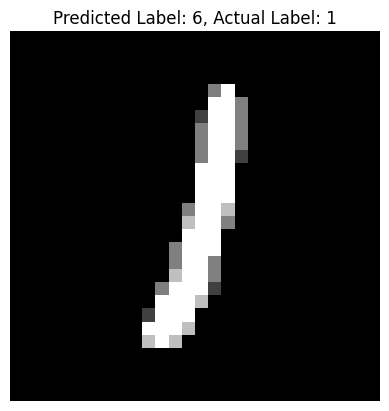

In [22]:
# Get one test image and its label
image, label = images[22], labels[22]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions_1[22]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

#### Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

`Experiment_1`: Trying with optimizer "SGD" and adding a "Drop_out Method = 0.5"

In [23]:
class MLP_Experimental(nn.Module):
    def __init__(self):
        super(MLP_Experimental, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model_exp_1 = MLP_Experimental()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_exp_1.parameters(), lr=0.01, momentum=0.9)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_exp_1.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_exp_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training Experimental Model')

# Evaluate the experimental model
model_exp_1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_exp_1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set with experimental model: {correct / total * 100:.2f}%')

Epoch 1, Batch 100, Loss: 1.980127625465393
Epoch 1, Batch 200, Loss: 0.7905675685405731
Epoch 1, Batch 300, Loss: 0.5687614041566849
Epoch 1, Batch 400, Loss: 0.4562244939804077
Epoch 1, Batch 500, Loss: 0.41615012362599374
Epoch 1, Batch 600, Loss: 0.40103195250034335
Epoch 1, Batch 700, Loss: 0.34813485115766524
Epoch 1, Batch 800, Loss: 0.3367980572581291
Epoch 1, Batch 900, Loss: 0.3243399025499821
Epoch 2, Batch 100, Loss: 0.27548812128603456
Epoch 2, Batch 200, Loss: 0.27357149302959444
Epoch 2, Batch 300, Loss: 0.2568907557427883
Epoch 2, Batch 400, Loss: 0.2562090913206339
Epoch 2, Batch 500, Loss: 0.22148705497384072
Epoch 2, Batch 600, Loss: 0.2218532706052065
Epoch 2, Batch 700, Loss: 0.20284195590764284
Epoch 2, Batch 800, Loss: 0.2386331881582737
Epoch 2, Batch 900, Loss: 0.19268464233726262
Epoch 3, Batch 100, Loss: 0.18881758723407985
Epoch 3, Batch 200, Loss: 0.19461875107139348
Epoch 3, Batch 300, Loss: 0.17883789394050836
Epoch 3, Batch 400, Loss: 0.19040871791541578

In [24]:
# Evaluate the model on training data
model_exp_1.eval()
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model_exp_1(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

print(f'Accuracy on train set: {correct_train / total_train}%')

Accuracy on train set: 0.9658%


Accuracy infact decreased from 96.39 to 95.59

`Experiment_2`: Trying with MSE Loss with one hot encoding for class, 
 - and increasing the number of nodes in the layer to 256 (In the original model),
 - and activation function used is Leaky_relu

In [33]:
import torch.nn.functional as F
class ModifiedMLP(nn.Module):
    def __init__(self):
        super(ModifiedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model_exp_2 = ModifiedMLP()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model_exp_2.parameters(), lr=0.001)

# One-hot encode the labels for MSE Loss
def one_hot_encode(labels, num_classes=10):
    return torch.eye(num_classes)[labels]

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model_exp_2.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        optimizer.zero_grad()
        outputs = model_exp_2(inputs)
        one_hot_labels = one_hot_encode(labels)
        loss = criterion(outputs, one_hot_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.04619577061384916
Epoch 1, Batch 200, Loss: 0.023672600015997886
Epoch 1, Batch 300, Loss: 0.01800936648622155
Epoch 1, Batch 400, Loss: 0.016334815211594106
Epoch 1, Batch 500, Loss: 0.014345230730250479
Epoch 1, Batch 600, Loss: 0.01303280054591596
Epoch 1, Batch 700, Loss: 0.012226393586024642
Epoch 1, Batch 800, Loss: 0.0108694141311571
Epoch 1, Batch 900, Loss: 0.010492042698897421
Epoch 2, Batch 100, Loss: 0.009506057514809072
Epoch 2, Batch 200, Loss: 0.009306090413592755
Epoch 2, Batch 300, Loss: 0.009143554684706033
Epoch 2, Batch 400, Loss: 0.008964488226920366
Epoch 2, Batch 500, Loss: 0.008000880149193108
Epoch 2, Batch 600, Loss: 0.007670825405512005
Epoch 2, Batch 700, Loss: 0.008238831623457373
Epoch 2, Batch 800, Loss: 0.007450432321056724
Epoch 2, Batch 900, Loss: 0.007914468764793127
Epoch 3, Batch 100, Loss: 0.007053357288241386
Epoch 3, Batch 200, Loss: 0.006426715918350965
Epoch 3, Batch 300, Loss: 0.006994062068406493
Epoch 3, Batch 400

In [34]:
# Evaluate the model on the test set
model_exp_2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_exp_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total}%')

# Evaluate the model on the train set
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model_exp_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total}%')


Accuracy on test set: 97.00333333333333%
Accuracy on train set: 97.90333333333334%


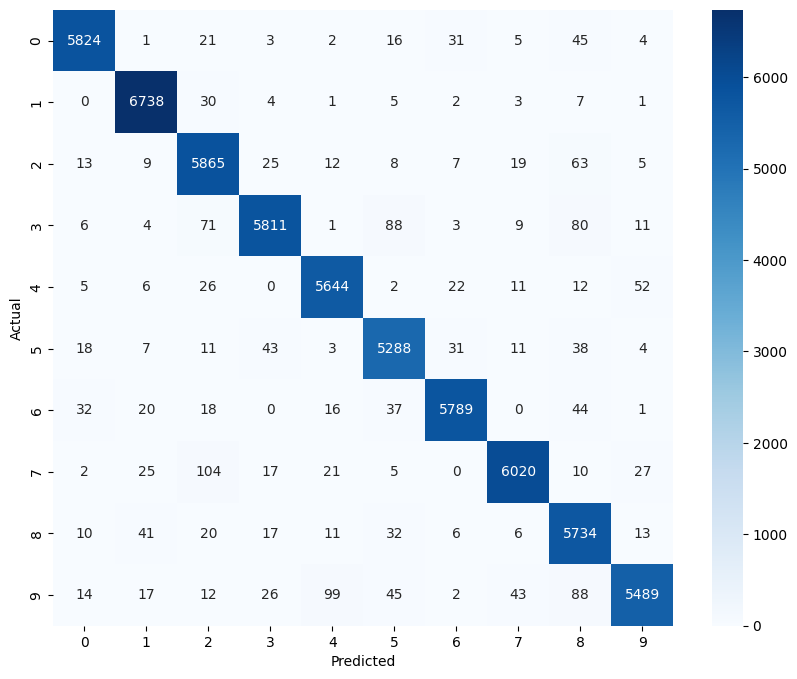

In [35]:
# Confusion Matrix

all_preds = torch.tensor([])
all_labels = torch.tensor([])

model_exp_2.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_exp_2(images)
        _, predicted = torch.max(outputs, 1)
        all_preds = torch.cat((all_preds, predicted), dim=0)
        all_labels = torch.cat((all_labels, labels), dim=0)

conf_matrix = confusion_matrix(all_labels.numpy(), all_preds.numpy())

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

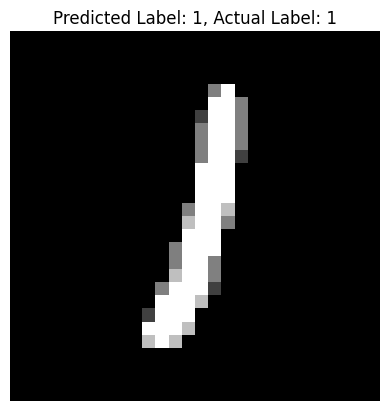

In [36]:
# Visualize a sample image from test set with its prediction
sample_idx = 22  # Change this index to visualize different samples
image, label = images[sample_idx], labels[sample_idx]
image = image.view(28, 28)
image_numpy = image.numpy()
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted[sample_idx].item()}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

Result: We have successfully been able to increase accuracy to 97.00%. Model is able to classify most of the predictions correct as seen in the visualisation, it correctly predicted digit 1

`Experiment_3`: Adding drop_out to every layer and using Adam optimiser and Leaky_Relu, increased epochs as well

In [37]:
class ModifiedMLPWithDropout(nn.Module):
    def __init__(self):
        super(ModifiedMLPWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.leaky_relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# Initialize the neural network
model_exp_3 = ModifiedMLPWithDropout()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss
optimizer = optim.Adam(model_exp_3.parameters(), lr=0.001)


# Train the experimental neural network
num_epochs = 7
for epoch in range(num_epochs):
    model_exp_3.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_exp_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training Experimental Model')

Epoch 1, Batch 100, Loss: 1.2994493916630745
Epoch 1, Batch 200, Loss: 0.5398693853616714
Epoch 1, Batch 300, Loss: 0.4457672129571438
Epoch 1, Batch 400, Loss: 0.39032363772392276
Epoch 1, Batch 500, Loss: 0.3569881373643875
Epoch 1, Batch 600, Loss: 0.3270804576575756
Epoch 1, Batch 700, Loss: 0.3197494456171989
Epoch 1, Batch 800, Loss: 0.30628120139241216
Epoch 1, Batch 900, Loss: 0.27052446864545343
Epoch 2, Batch 100, Loss: 0.2667520346492529
Epoch 2, Batch 200, Loss: 0.2531517510861158
Epoch 2, Batch 300, Loss: 0.24754338033497333
Epoch 2, Batch 400, Loss: 0.22830912359058858
Epoch 2, Batch 500, Loss: 0.24193443214520813
Epoch 2, Batch 600, Loss: 0.23188095681369306
Epoch 2, Batch 700, Loss: 0.23615110773593187
Epoch 2, Batch 800, Loss: 0.22544144425541163
Epoch 2, Batch 900, Loss: 0.20860893700271846
Epoch 3, Batch 100, Loss: 0.1844349928945303
Epoch 3, Batch 200, Loss: 0.19328733086585997
Epoch 3, Batch 300, Loss: 0.20087972462177275
Epoch 3, Batch 400, Loss: 0.198249191753566

In [38]:
# Evaluate the experimental model
model_exp_3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_exp_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set with experimental model: {correct / total * 100:.2f}%')

Accuracy on test set with experimental model: 96.91%


In [39]:
# Evaluate the model on the train set
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model_exp_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total}%')


Accuracy on train set: 97.8%


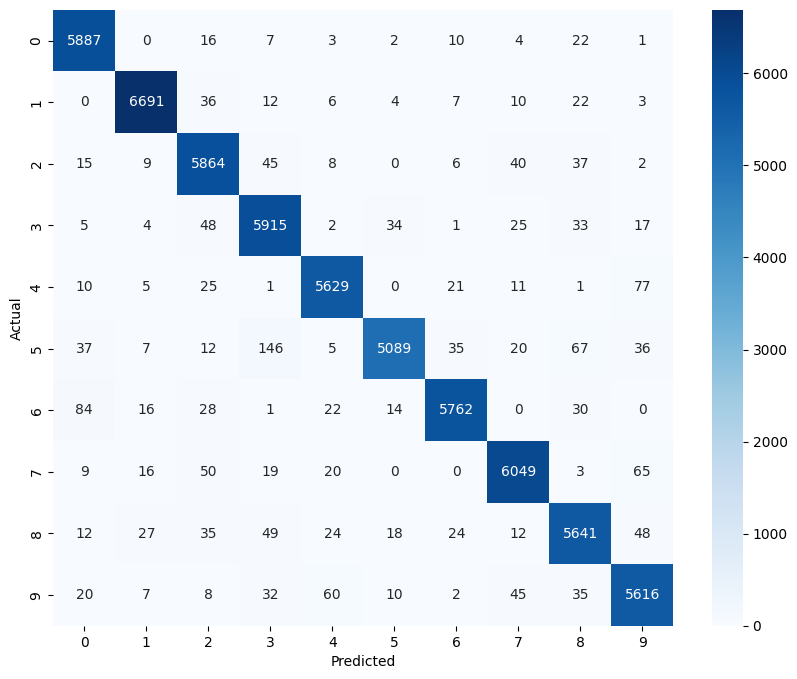

In [40]:
# Confusion Matrix
all_preds = torch.tensor([])
all_labels = torch.tensor([])

model_exp_3.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_exp_3(images)
        _, predicted = torch.max(outputs, 1)
        all_preds = torch.cat((all_preds, predicted), dim=0)
        all_labels = torch.cat((all_labels, labels), dim=0)

conf_matrix = confusion_matrix(all_labels.numpy(), all_preds.numpy())

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


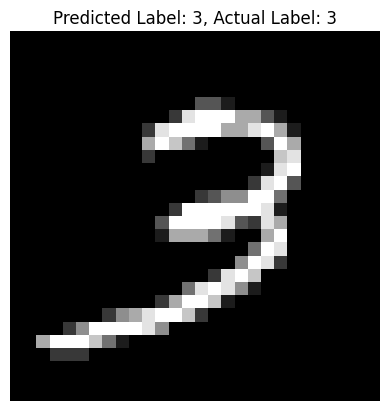

In [41]:
# Visualize a sample image from test set with its prediction
sample_idx = 20  # Change this index to visualize different samples
image, label = images[sample_idx], labels[sample_idx]
image = image.view(28, 28)
image_numpy = image.numpy()
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted[sample_idx].item()}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

Result: Accuracy did not improve from 97% at test dataset

`Experiment_4`: Using the negative log likelihood (NLL) los function and SGD optimiser

The NLLLoss requires the outputs from the network to be log-probabilities, which we can get using log_softmax in the final layer of model.This loss function measures the dissimilarity between the predicted probability distribution (output of the model) and the true distribution (actual labels).

In [43]:
class MLPWithNLL(nn.Module):
    def __init__(self):
        super(MLPWithNLL, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)  # log_softmax for NLLLoss
        return x

# Initialize the neural network
model_exp_4 = MLPWithNLL()

# Define the loss function and optimizer
criterion = nn.NLLLoss()  # Negative Log Likelihood Loss
optimizer = optim.SGD(model_exp_4.parameters(), lr=0.01, momentum=0.9)  # SGD optimizer

# Training loop
num_epochs = 15
for epoch in range(num_epochs):
    model_exp_4.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        optimizer.zero_grad()
        outputs = model_exp_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.318228400349617
Epoch 1, Batch 200, Loss: 0.4369490088522434
Epoch 1, Batch 300, Loss: 0.37046023949980733
Epoch 1, Batch 400, Loss: 0.34912437975406646
Epoch 1, Batch 500, Loss: 0.2779686754196882
Epoch 1, Batch 600, Loss: 0.2511984881013632
Epoch 1, Batch 700, Loss: 0.2593164002150297
Epoch 1, Batch 800, Loss: 0.23943657420575618
Epoch 1, Batch 900, Loss: 0.2178282878175378
Epoch 2, Batch 100, Loss: 0.18857628900557757
Epoch 2, Batch 200, Loss: 0.17291135981678962
Epoch 2, Batch 300, Loss: 0.194908734112978
Epoch 2, Batch 400, Loss: 0.17059213556349279
Epoch 2, Batch 500, Loss: 0.15885872886516153
Epoch 2, Batch 600, Loss: 0.15077060075476767
Epoch 2, Batch 700, Loss: 0.16260858859866859
Epoch 2, Batch 800, Loss: 0.14376420330256223
Epoch 2, Batch 900, Loss: 0.13923892743885516
Epoch 3, Batch 100, Loss: 0.12936655206605793
Epoch 3, Batch 200, Loss: 0.12341278152540326
Epoch 3, Batch 300, Loss: 0.11145440584048628
Epoch 3, Batch 400, Loss: 0.129298068415373

In [44]:
# Evaluate the model
model_exp_4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_exp_4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {correct / total * 100:.2f}%')

# Evaluate the model on the train set
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = model_exp_4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: {100 * correct / total}%')

Accuracy on test set: 97.58%
Accuracy on train set: 99.39833333333333%


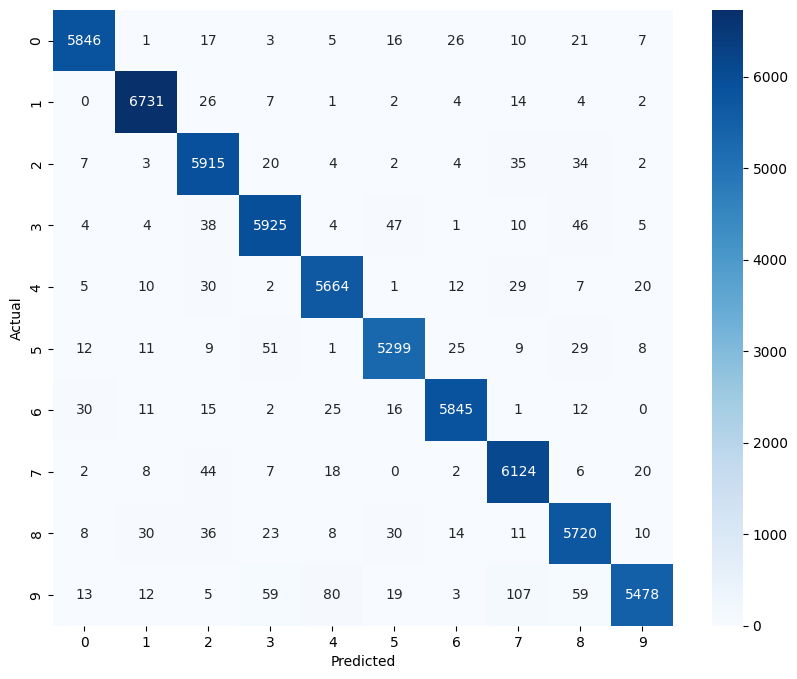

In [45]:
# Confusion Matrix

all_preds = torch.tensor([])
all_labels = torch.tensor([])

model_exp_4.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_exp_4(images)
        _, predicted = torch.max(outputs, 1)
        all_preds = torch.cat((all_preds, predicted), dim=0)
        all_labels = torch.cat((all_labels, labels), dim=0)

conf_matrix = confusion_matrix(all_labels.numpy(), all_preds.numpy())

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


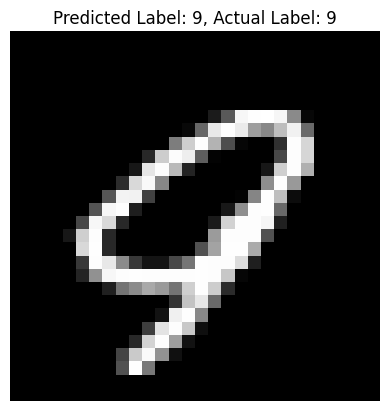

In [46]:
# Visualize a sample image from test set with its prediction
sample_idx = 27  # Change this index to visualize different samples
image, label = images[sample_idx], labels[sample_idx]
image = image.view(28, 28)
image_numpy = image.numpy()
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predicted[sample_idx].item()}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

This is so far the highest accuracy we recieved for QMNIST dataset i.e at 97.58%

Thank You!